###                     Customer Purchasing Behavior Analysis

working on analyzing customer purchasing behaviour. Using the provided dataset, perform the following tasks:

Build a machine learning model to predict whether a customer will spend above or below the average transaction value (Total column).        
Use appropriate evaluation metrics (accuracy, precision, recall, and F1-score) to assess the model's performance.           
Provide a brief report on the most important features (e.g., Product line, Branch, Customer type, etc.) that influence customer spending behaviour.         
Suggest strategies for increasing customer transaction amounts based on your findings.

Step 1: Import Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


Step 2: Load the Dataset

In [65]:
# Load the dataset
data = pd.read_csv("supermarket_sales - Sheet1.csv")
# Display the first few rows of the dataset
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Step 3: Check for Missing Values

In [66]:
print(data.isnull().sum())


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


Step 4: Calculate Average Transaction Value (ATV)

In [67]:
# Average Transaction Value (ATV)= Sum of Transaction Amounts ​/Number of Transactions
# Average Transaction Value (ATV) = 322.966749

average_value = data['Total'].mean()
# 1 if Transaction Amount>ATV
# 0 if Transaction Amount≤ATV
data['Average Transaction Status'] = (data['Total'] > average_value).astype(int)

# Display the first few rows to verify the new column
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Average Transaction Status
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,1


Step 5: Prepare Features and Target Variable

In [68]:
features = data[['Product line', 'Quantity', 'Branch', 'Payment', 'Customer type']]
target = data['Average Transaction Status']
print(features)


               Product line  Quantity Branch      Payment Customer type
0         Health and beauty         7      A      Ewallet        Member
1    Electronic accessories         5      C         Cash        Normal
2        Home and lifestyle         7      A  Credit card        Normal
3         Health and beauty         8      A      Ewallet        Member
4         Sports and travel         7      A      Ewallet        Normal
..                      ...       ...    ...          ...           ...
995       Health and beauty         1      C      Ewallet        Normal
996      Home and lifestyle        10      B      Ewallet        Normal
997      Food and beverages         1      A         Cash        Member
998      Home and lifestyle         1      A         Cash        Normal
999     Fashion accessories         7      A         Cash        Member

[1000 rows x 5 columns]


Step 6: One-Hot Encoding

In [69]:
#Convert categorical variables into numerical format using one-hot encoding.
features_encoded = pd.get_dummies(features)

# Display the encoded features
features_encoded.head()

,Quantity,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Branch_A,Branch_B,Branch_C,Payment_Cash,Payment_Credit card,Payment_Ewallet,Customer type_Member,Customer type_Normal
0,7,False,False,False,True,False,False,True,False,False,False,False,True,True,False
1,5,True,False,False,False,False,False,False,False,True,True,False,False,False,True
2,7,False,False,False,False,True,False,True,False,False,False,True,False,False,True
3,8,False,False,False,True,False,False,True,False,False,False,False,True,True,False
4,7,False,False,False,False,False,True,True,False,False,False,False,True,False,True


Step 7: Split the Dataset

In [70]:
# Split the dataset into training and testing sets
# X_train: Training features.
# y_train: Training labels.
# X_test: Testing features.
# y_test: Testing labels.

X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=42)
# Print shapes for verification
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (800, 15) (800,)
Testing set shape: (200, 15) (200,)


Step 8: Scale the Features

In [71]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaled Training Data:")
print(X_train_scaled)

print("\nScaled Test Data:")
print(X_test_scaled)

Scaled Training Data:
[[ 1.18465655 -0.4445276  -0.46056619 ... -0.72374686 -1.0100505
   1.0100505 ]
 [ 0.5074681  -0.4445276  -0.46056619 ...  1.38169856 -1.0100505
   1.0100505 ]
 [-0.16972036 -0.4445276  -0.46056619 ... -0.72374686  0.9900495
  -0.9900495 ]
 ...
 [-1.52409727 -0.4445276  -0.46056619 ...  1.38169856  0.9900495
  -0.9900495 ]
 [ 1.18465655 -0.4445276  -0.46056619 ...  1.38169856 -1.0100505
   1.0100505 ]
 [ 1.18465655  2.24957909 -0.46056619 ... -0.72374686 -1.0100505
   1.0100505 ]]

Scaled Test Data:
[[ 0.16887387 -0.4445276  -0.46056619 ... -0.72374686  0.9900495
  -0.9900495 ]
 [ 1.52325078  2.24957909 -0.46056619 ...  1.38169856 -1.0100505
   1.0100505 ]
 [ 0.5074681  -0.4445276  -0.46056619 ... -0.72374686 -1.0100505
   1.0100505 ]
 ...
 [-0.84690881 -0.4445276   2.17124059 ...  1.38169856 -1.0100505
   1.0100505 ]
 [-1.52409727 -0.4445276  -0.46056619 ... -0.72374686  0.9900495
  -0.9900495 ]
 [ 1.52325078 -0.4445276  -0.46056619 ...  1.38169856  0.9900495
  -

Step 9: Train the Logistic Regression Model

In [72]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

Step 10: Make Predictions

In [73]:
# Make predictions on the test set
prediction = model.predict(X_test_scaled)
print(prediction)

[0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1
 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1
 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1
 0 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1]


Step 11: Evaluate Model Performance

In [74]:
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.74
Precision: 0.75
Recall: 0.61
F1 Score: 0.67


Step 12: Display Classification Report and Confusion Matrix


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.84      0.79       113
           1       0.75      0.61      0.67        87

    accuracy                           0.74       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.74      0.74      0.74       200



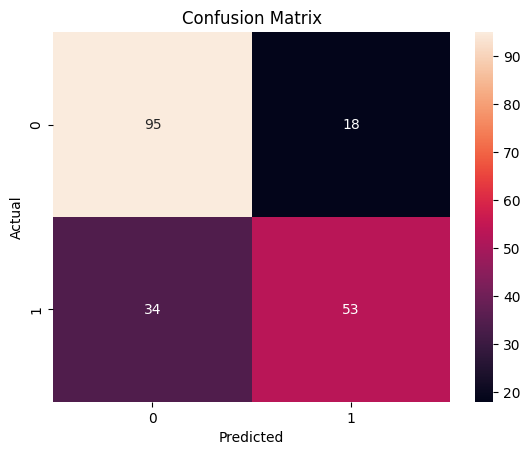

In [75]:
print("\nClassification Report:\n", classification_report(y_test, prediction))
confusion = confusion_matrix(y_test, prediction)
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Step 13: Feature Importance Visualization

In [76]:
# Create DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': features_encoded.columns,
    'Importance': np.abs(model.coef_[0])  # Calculate absolute importance directly
})

# Sort by importance
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

# Display the sorted feature importance values
#print(feature_importance[['Feature', 'Importance']])

Step 14: Plot Feature Importance

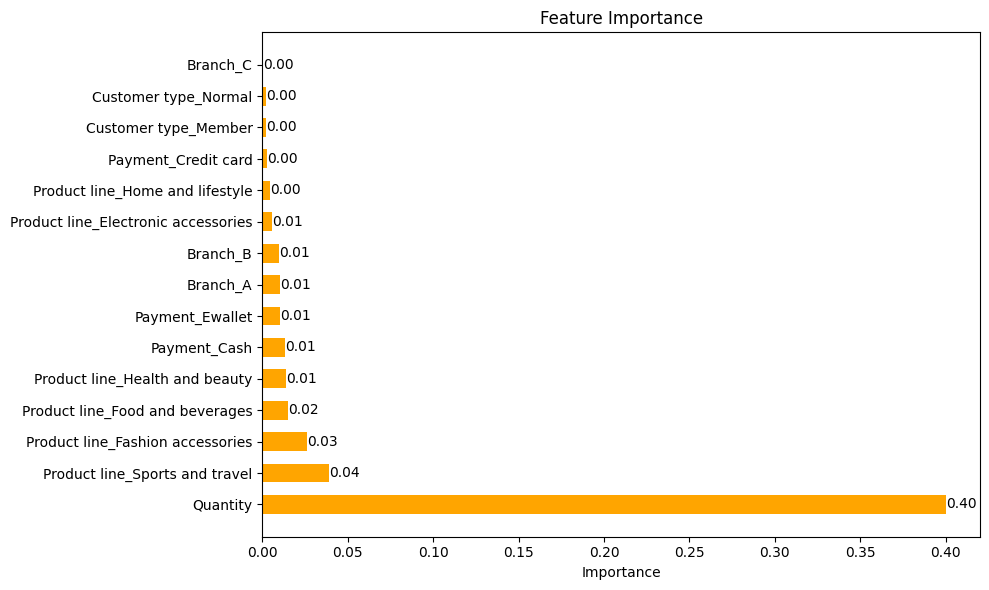

In [77]:
# Create horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))
y = np.arange(len(feature_importance))

# Increase the height of the bars
bar_width = 0.6  # Adjust this value for thicker bars
bars = ax.barh(y, scaled_heights, height=bar_width, color='orange')

# Add data points on each bar
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
            f'{bar.get_width():.2f}',  # Format the value
            va='center', ha='left',  # Adjust text position
            fontsize=10)

ax.set_xlabel('Importance')
ax.set_title('Feature Importance')
ax.set_yticks(y)
ax.set_yticklabels(feature_importance['Feature'])

plt.tight_layout()
plt.show()

Step 15: Average Spending Analysis for product line

C:\Users\harsh\AppData\Local\Temp\ipykernel_9852\695740019.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Product line', data=average_spending_by_product_line, palette='viridis')


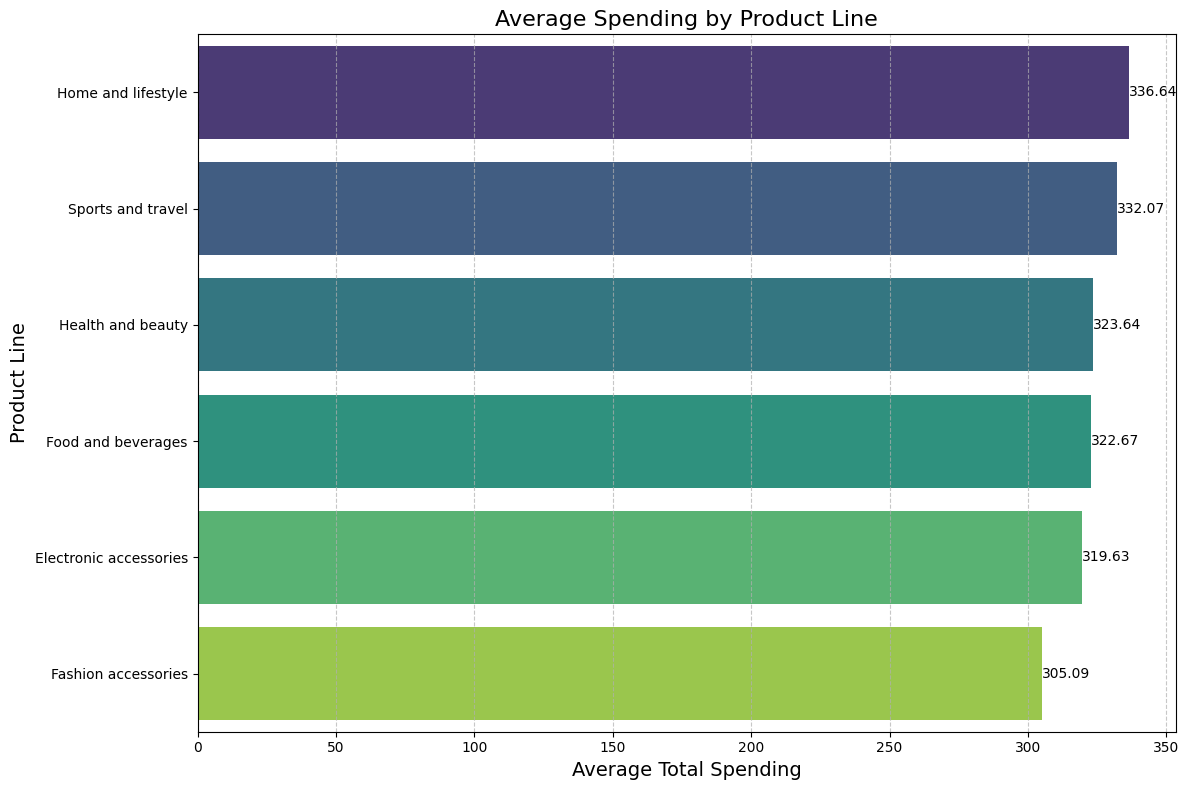

In [78]:


# Calculate average spending by Product Line
average_spending_by_product_line = data.groupby('Product line')['Total'].mean().reset_index()

# Sort the DataFrame in descending order
average_spending_by_product_line = average_spending_by_product_line.sort_values(by='Total', ascending=False)

# Plotting the average spending by Product Line
plt.figure(figsize=(12, 8))
sns.barplot(x='Total', y='Product line', data=average_spending_by_product_line, palette='viridis')

# Adding value labels on top of bars
for index, value in enumerate(average_spending_by_product_line['Total']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.title('Average Spending by Product Line', fontsize=16)
plt.xlabel('Average Total Spending', fontsize=14)
plt.ylabel('Product Line', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Average Spending by City

C:\Users\harsh\AppData\Local\Temp\ipykernel_9852\2119112302.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='City', data=average_spending_by_city, palette='viridis')


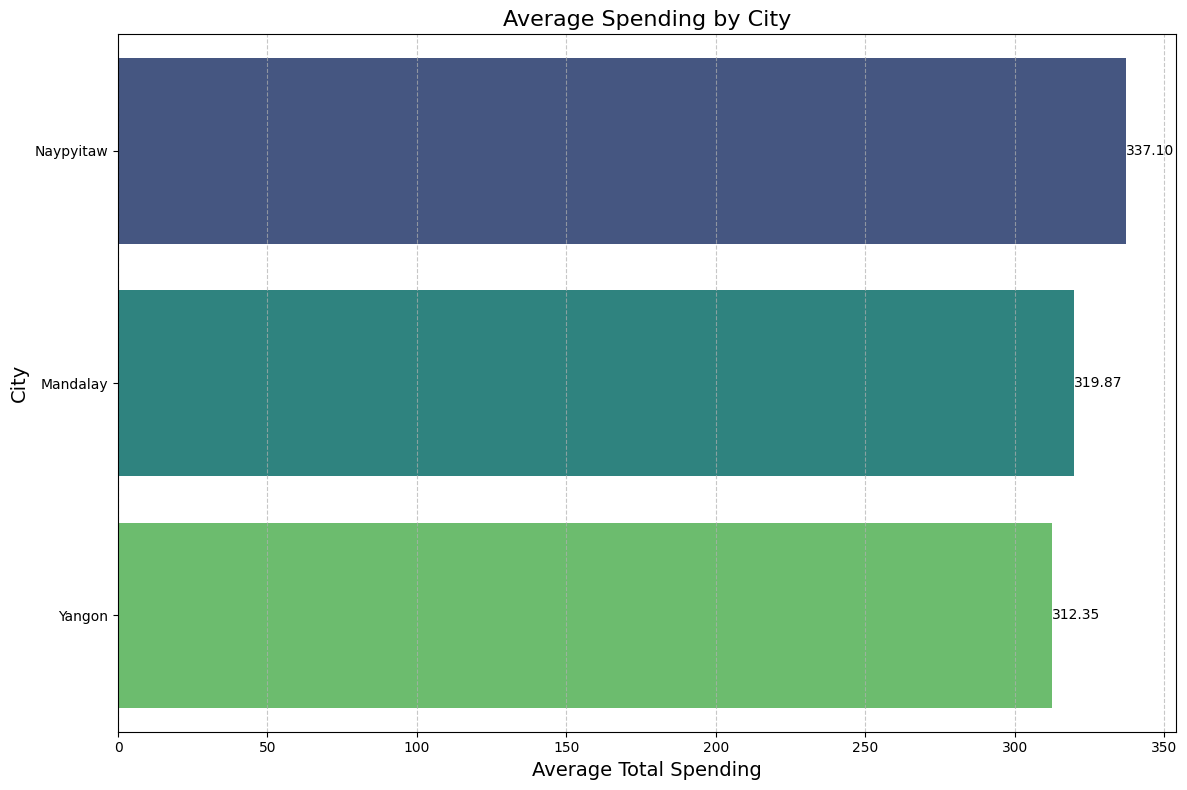

In [79]:
# Calculate average spending by City
average_spending_by_city = data.groupby('City')['Total'].mean().reset_index()

# Sort the DataFrame in descending order
average_spending_by_city = average_spending_by_city.sort_values(by='Total', ascending=False)

# Plotting the average spending by City
plt.figure(figsize=(12, 8))
sns.barplot(x='Total', y='City', data=average_spending_by_city, palette='viridis')

# Adding value labels on top of bars
for index, value in enumerate(average_spending_by_city['Total']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.title('Average Spending by City', fontsize=16)
plt.xlabel('Average Total Spending', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Average Spending by Customer Type

C:\Users\harsh\AppData\Local\Temp\ipykernel_9852\42835376.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Customer type', data=average_spending_by_customer_type, palette='viridis')


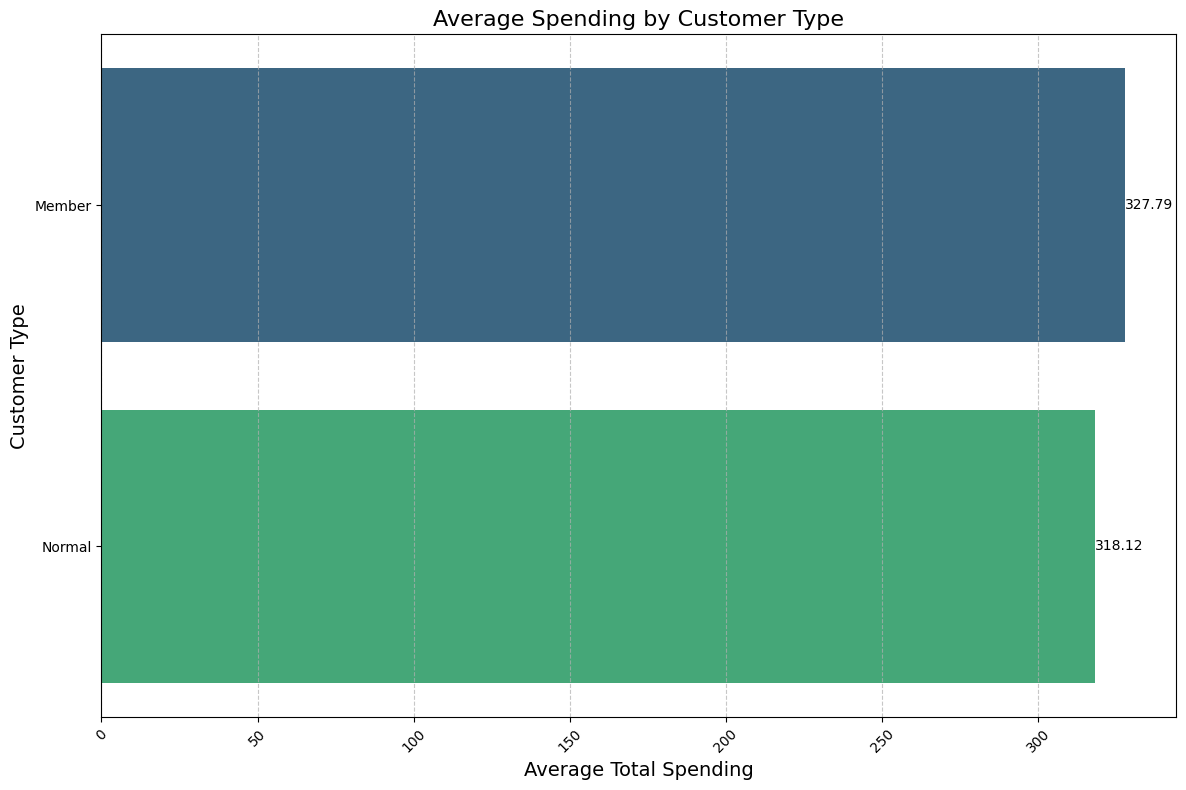

In [80]:
# Calculate average spending by Customer Type
average_spending_by_customer_type = data.groupby('Customer type')['Total'].mean().reset_index()

# Sort the DataFrame in descending order
average_spending_by_customer_type = average_spending_by_customer_type.sort_values(by='Total', ascending=False)

# Plotting the average spending by Customer Type
plt.figure(figsize=(12, 8))
sns.barplot(x='Total', y='Customer type', data=average_spending_by_customer_type, palette='viridis')

# Adding value labels on top of bars
for index, value in enumerate(average_spending_by_customer_type['Total']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.title('Average Spending by Customer Type', fontsize=16)
plt.xlabel('Average Total Spending', fontsize=14)
plt.ylabel('Customer Type', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## CONCLUSION

 Member Spending: Members spend more on average than normal         
City Spending: Naypyitaw has the highest average spending compared to other cities. 
Product Line: Home and lifestyle products are the most popular among customers.     

### Suggest strategies for increasing customer transaction amounts based on your findings.

1.Bundling Products: Offer discounts on multiple items purchased together, encouraging customers to buy more.   

2.Targeted Promotions: Focus on popular product lines like "Sports and travel" and "Fashion accessories" with special deals to attract interest.  

3.Payment Incentives: Encourage cash and e-wallet payments by providing rewards or cashback offers for using these methods.--

4.Enhanced Membership Benefits: Improve loyalty programs with exclusive deals and rewards that motivate members to spend more.